In [34]:

import pandas as pd

# URLs
cpi_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?cosd=1990-01-01&coed=2040-01-01&id=CPIAUCSL"
fedfunds_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS"

# --- Load data ---
cpi = pd.read_csv(cpi_url)
fedfunds = pd.read_csv(fedfunds_url)

# --- Format columns ---
cpi.columns = ["Date", "CPI"]
cpi["Date"] = pd.to_datetime(cpi["Date"])
cpi.set_index("Date", inplace=True)

fedfunds.columns = ["Date", "Interest_Rate"]
fedfunds["Date"] = pd.to_datetime(fedfunds["Date"])
fedfunds.set_index("Date", inplace=True)

# --- Align monthly frequency ---
cpi = cpi.resample("M").mean()
fedfunds = fedfunds.resample("M").mean()

# --- Compute inflation (YoY %) ---
cpi["Inflation_Rate"] = cpi["CPI"].pct_change(12) * 100

# --- Merge CPI + Fed Funds ---
df = cpi.merge(fedfunds, left_index=True, right_index=True, how="inner")

# --- Filter only 2019–2025 Q3 ---
df = df.loc["2019-01-01":"2025-09-30"].copy()

# --- Optional: inspect result ---
print(df.head())
print(df.tail())
print(f"\nData range: {df.index.min().date()} → {df.index.max().date()} ({len(df)} months)")




                CPI  Inflation_Rate  Interest_Rate
Date                                              
2019-01-31  252.561        1.487589           2.40
2019-02-28  253.319        1.518862           2.40
2019-03-31  254.277        1.883186           2.41
2019-04-30  255.233        2.000583           2.42
2019-05-31  255.296        1.795911           2.39
                CPI  Inflation_Rate  Interest_Rate
Date                                              
2025-05-31  320.580        2.375934           4.33
2025-06-30  321.500        2.672683           4.33
2025-07-31  322.132        2.731801           4.33
2025-08-31  323.364        2.939220           4.33
2025-09-30  324.368        3.022700           4.22

Data range: 2019-01-31 → 2025-09-30 (81 months)


/tmp/ipykernel_649/621724156.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi = cpi.resample("M").mean()
/tmp/ipykernel_649/621724156.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fedfunds = fedfunds.resample("M").mean()


In [35]:
df

,CPI,Inflation_Rate,Interest_Rate
Date,,,
2019-01-31,252.561,1.487589,2.40
2019-02-28,253.319,1.518862,2.40
2019-03-31,254.277,1.883186,2.41
2019-04-30,255.233,2.000583,2.42
2019-05-31,255.296,1.795911,2.39
...,...,...,...
2025-05-31,320.580,2.375934,4.33
2025-06-30,321.500,2.672683,4.33
2025-07-31,322.132,2.731801,4.33


In [29]:
fedfunds

,Interest_Rate
Date,
1954-07-31,0.80
1954-08-31,1.22
1954-09-30,1.07
1954-10-31,0.85
1954-11-30,0.83
...,...
2025-06-30,4.33
2025-07-31,4.33
2025-08-31,4.33


Before AI boom: 2019-01-31 to 2022-09-30
After AI boom: 2022-10-31 to 2025-09-30

Average Rates by Period:
           Inflation_Rate  Interest_Rate
Before_AI        3.724575       0.902444
After_AI         3.633458       4.773056


/tmp/ipykernel_649/2112373795.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi = cpi.resample('M').mean()
/tmp/ipykernel_649/2112373795.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fedfunds = fedfunds.resample('M').mean()


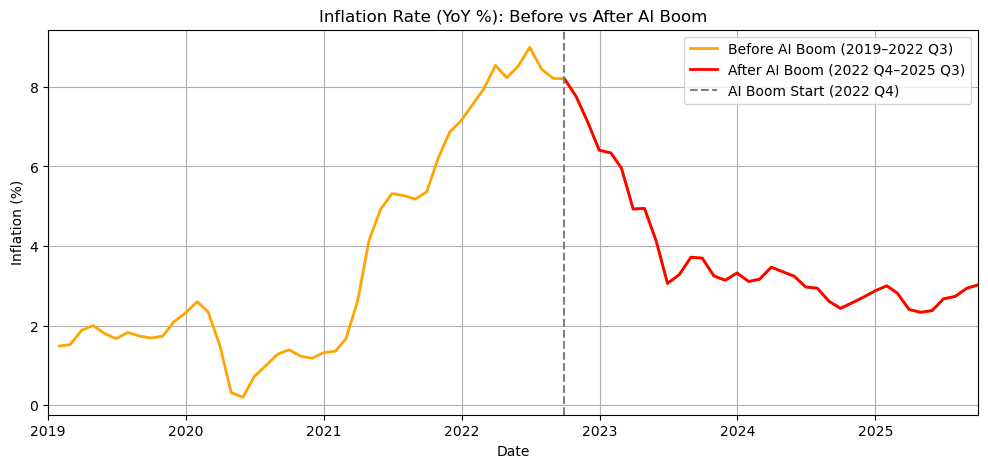

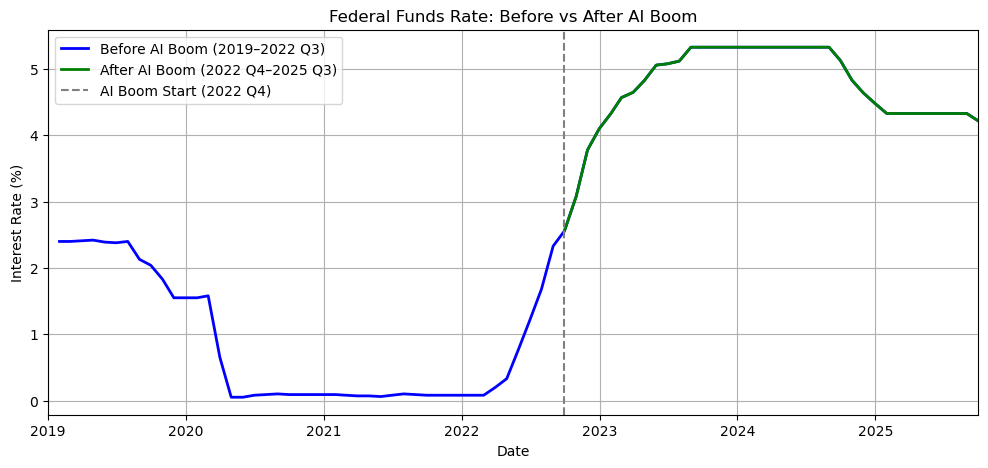

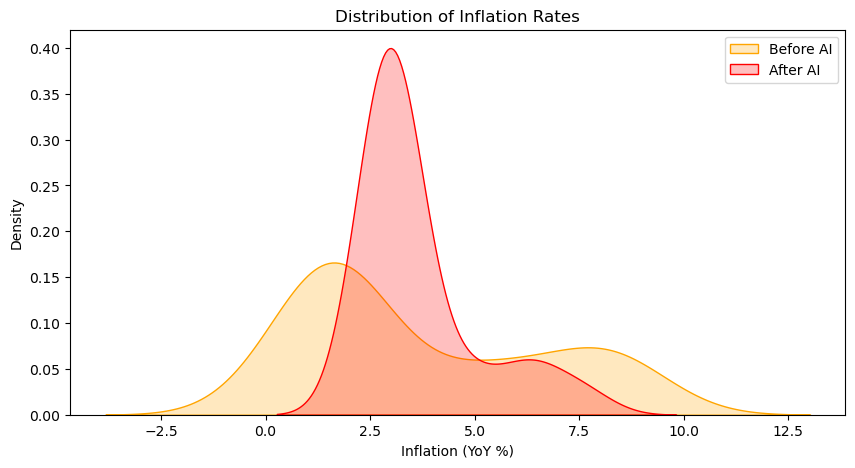

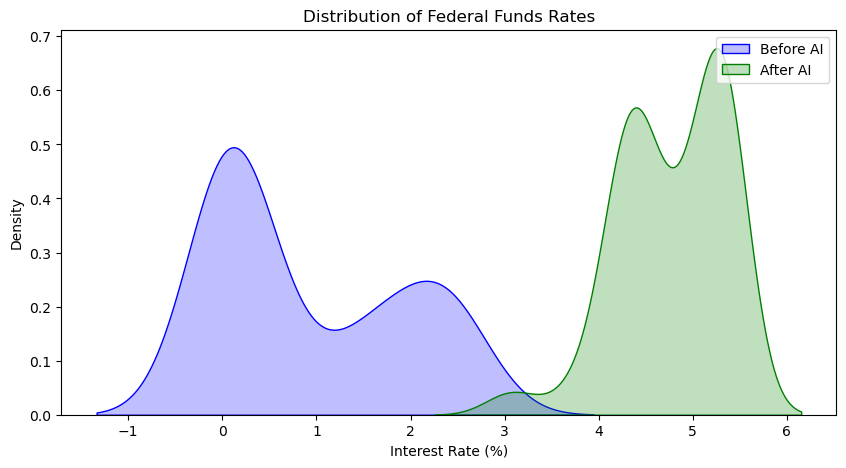


Correlation (Inflation vs Fed Funds):
Before AI boom (2019–2022 Q3): -0.11
After AI boom (2022 Q4–2025 Q3): -0.49


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load & Clean Data
# ----------------------------
cpi_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?cosd=1990-01-01&coed=2040-01-01&id=CPIAUCSL'
fedfunds_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS"

cpi = pd.read_csv(cpi_url)
fedfunds = pd.read_csv(fedfunds_url)

cpi.columns = ['Date', 'CPI']
cpi['Date'] = pd.to_datetime(cpi['Date'])
cpi.set_index('Date', inplace=True)

fedfunds.columns = ['Date', 'Interest_Rate']
fedfunds['Date'] = pd.to_datetime(fedfunds['Date'])
fedfunds.set_index('Date', inplace=True)

# Align monthly frequency
cpi = cpi.resample('M').mean()
fedfunds = fedfunds.resample('M').mean()

# ----------------------------
# 2. Inflation (YoY %)
# ----------------------------
cpi['Inflation_Rate'] = cpi['CPI'].pct_change(12) * 100
df = cpi.merge(fedfunds, left_index=True, right_index=True, how='inner')

# ----------------------------
# 3. Filter Time Periods
# ----------------------------
before_ai = df.loc['2019-01-01':'2022-09-30'].copy()
after_ai  = df.loc['2022-10-01':'2025-09-30'].copy()

print("Before AI boom:", before_ai.index.min().date(), "to", before_ai.index.max().date())
print("After AI boom:", after_ai.index.min().date(), "to", after_ai.index.max().date())

# ----------------------------
# 4. Summary Statistics
# ----------------------------
summary = pd.DataFrame({
    "Before_AI": before_ai[['Inflation_Rate', 'Interest_Rate']].mean(),
    "After_AI": after_ai[['Inflation_Rate', 'Interest_Rate']].mean(),
}).T

print("\nAverage Rates by Period:")
print(summary)

# ----------------------------
# 5. Line Plots by Period
# ----------------------------

ai_boom_start = pd.Timestamp("2022-10-01")

# Trim to 2019–2025 Q3
df_period = df.loc['2019-01-01':'2025-09-30'].copy()

# Find the index nearest to the AI boom start date
split_idx = df_period.index.get_indexer([ai_boom_start], method='nearest')[0]

# --- Inflation Plot ---
plt.figure(figsize=(12,5))

# Continuous base line
plt.plot(df_period.index, df_period['Inflation_Rate'], color='orange', linewidth=2)

# Overplot after-AI portion (same line, new color)
plt.plot(df_period.index[split_idx:], df_period['Inflation_Rate'].iloc[split_idx:],
         color='red', linewidth=2, label='After AI Boom (2022 Q4–2025 Q3)')

# Divider line
plt.axvline(df_period.index[split_idx], color='gray', linestyle='--', linewidth=1.5, label='AI Boom Start (2022 Q4)')
plt.title("Inflation Rate (YoY %): Before vs After AI Boom")
plt.xlabel("Date")
plt.ylabel("Inflation (%)")
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2025-09-30'))
plt.legend(["Before AI Boom (2019–2022 Q3)", "After AI Boom (2022 Q4–2025 Q3)", "AI Boom Start (2022 Q4)"])
plt.grid(True)
plt.show()


# --- Fed Funds Plot ---
plt.figure(figsize=(12,5))

# Continuous base line
plt.plot(df_period.index, df_period['Interest_Rate'], color='blue', linewidth=2)

# Overplot after-AI portion (same line, new color)
plt.plot(df_period.index[split_idx:], df_period['Interest_Rate'].iloc[split_idx:],
         color='green', linewidth=2, label='After AI Boom (2022 Q4–2025 Q3)')

# Divider line
plt.axvline(df_period.index[split_idx], color='gray', linestyle='--', linewidth=1.5, label='AI Boom Start (2022 Q4)')
plt.title("Federal Funds Rate: Before vs After AI Boom")
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2025-09-30'))
plt.legend(["Before AI Boom (2019–2022 Q3)", "After AI Boom (2022 Q4–2025 Q3)", "AI Boom Start (2022 Q4)"])
plt.grid(True)
plt.show()
# ----------------------------
# 6. Distribution Comparison
# ----------------------------
plt.figure(figsize=(10,5))
sns.kdeplot(before_ai['Inflation_Rate'], fill=True, label='Before AI', color='orange')
sns.kdeplot(after_ai['Inflation_Rate'], fill=True, label='After AI', color='red')
plt.title("Distribution of Inflation Rates")
plt.xlabel("Inflation (YoY %)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(before_ai['Interest_Rate'], fill=True, label='Before AI', color='blue')
sns.kdeplot(after_ai['Interest_Rate'], fill=True, label='After AI', color='green')
plt.title("Distribution of Federal Funds Rates")
plt.xlabel("Interest Rate (%)")
plt.legend()
plt.show()

# ----------------------------
# 7. Correlation Within Each Period
# ----------------------------
corr_before = before_ai[['Inflation_Rate', 'Interest_Rate']].corr().iloc[0,1]
corr_after = after_ai[['Inflation_Rate', 'Interest_Rate']].corr().iloc[0,1]

print(f"\nCorrelation (Inflation vs Fed Funds):")
print(f"Before AI boom (2019–2022 Q3): {corr_before:.2f}")
print(f"After AI boom (2022 Q4–2025 Q3): {corr_after:.2f}")
